# EDA and cleaning, using NASDAQ_ITCH.csv

In [43]:
import warnings
warnings.filterwarnings('ignore') # Filter out warnings
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier #stochastic gradient descent
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
# Plot styling
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 9 , 5

In [44]:
file_path='NASDAQ_ITCH.csv'
df=pd.read_csv(file_path)
# df.head(5)

In [45]:
# Describe data features in terms of type
df.columns.values

array(['Index', 'Time', 'TVITCH_41::SINA.ORDER_ID',
       'TVITCH_41::SINA.BUY_SELL_FLAG', 'TVITCH_41::SINA.RECORD_TYPE',
       'TVITCH_41::SINA.MESSAGE_TYPE', 'TVITCH_41::SINA.DISPLAY_IND',
       'TVITCH_41::SINA.MPID', 'TVITCH_41::SINA.DELETED_TIME',
       'TVITCH_41::SINA.TICK_STATUS', 'TVITCH_41::SINA.PRICE',
       'TVITCH_41::SINA.SIZE', 'TVITCH_41::SINA.PICOS',
       'TVITCH_41::SINA.OMDSEQ'], dtype=object)

In [46]:
# renaming all columns
rdt = "TVITCH_41::SINA."
oldL = df.columns.values.tolist()
newL = []
for col in oldL:
    if rdt in col:
        newL.append(col[len(rdt):])
    else:
        newL.append(col)
newCol = dict(zip(oldL, newL))
df.rename(columns=newCol,inplace=True)
df.head(5)

,Index,Time,ORDER_ID,BUY_SELL_FLAG,RECORD_TYPE,MESSAGE_TYPE,DISPLAY_IND,MPID,DELETED_TIME,TICK_STATUS,PRICE,SIZE,PICOS,OMDSEQ
0,1,2013/10/23 09:30:00.040,5842977,1,R,A,NaN,NSDQ,NaN,0,85.08,300,523179000,260
1,2,2013/10/23 09:30:00.113,5868717,0,R,F,NaN,CDRG,NaN,0,70.98,100,237301000,66
2,3,2013/10/23 09:30:00.113,5868759,1,R,F,NaN,CDRG,NaN,0,98.69,100,394667000,121
3,4,2013/10/23 09:30:00.129,5333893,0,R,EA,NaN,NSDQ,NaN,0,84.49,38,770687000,335
4,5,2013/10/23 09:30:00.130,5872670,1,R,A,NaN,NSDQ,NaN,0,85.07,100,26050000,10


In [47]:
df['MESSAGE_TYPE'].unique()

array(['A', 'F', 'EA', 'D', 'UD', 'UA', 'X', 'CA'], dtype=object)

In [48]:
# adjusting the time, s.t. we only consider hour:minute:second
# time column is now in seconds after epoch
df['Time'] = pd.to_datetime(df['Time'])

#### Count trades within each hour

In [49]:
# 1)
# import datetime
# fmt = "%Y/%m/%d %H:%M:%S.%f"
# for index, row in df.iterrows():
#     time = datetime.datetime.strptime(row['Time'], fmt)

# 2)
# df.groupby([df['Time'].hour]).value_col.sum()

# 3) print(str(df['Time'][0])[11:13])
# for index, row in df.iterrows():
#     row['Hour'] = str(row['Time'])[11:13]

In [50]:
import datetime
import six
df['Hour'] = [d.time() for d in df['Time']]

In [51]:
# set Hour for each feature
for index, row in df.iterrows():
    val = str(row['Hour'])[0:2]
    df.set_value(index,'new_Hour',val)

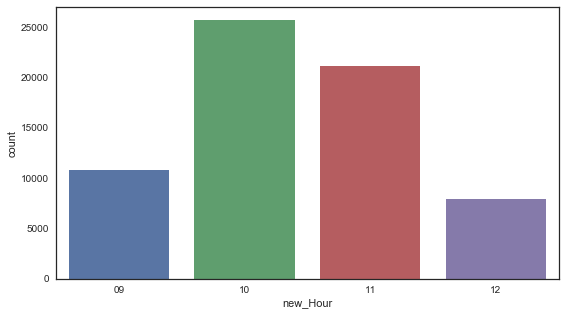

In [52]:
# number of trades within each hour
ax = sns.countplot(x="new_Hour", data=df)

### Some other data visualization

In [53]:
# Describe it in more detail
df.describe()

,Index,ORDER_ID,BUY_SELL_FLAG,DISPLAY_IND,DELETED_TIME,TICK_STATUS,PRICE,SIZE,PICOS,OMDSEQ
count,65591.00000,6.559100e+04,65591.000000,0.0,0.0,65591.0,65591.000000,65591.000000,6.559100e+04,65591.000000
mean,32796.00000,7.556465e+07,0.459118,NaN,NaN,0.0,84.363573,55.165541,4.935548e+08,22.449360
std,18934.63509,3.706248e+07,0.498330,NaN,NaN,0.0,5.403287,106.678680,2.894240e+08,72.996462
min,1.00000,5.665300e+04,0.000000,NaN,NaN,0.0,0.010000,0.000000,0.000000e+00,0.000000
25%,16398.50000,4.798644e+07,0.000000,NaN,NaN,0.0,83.960000,0.000000,2.392540e+08,3.000000
50%,32796.00000,7.565294e+07,0.000000,NaN,NaN,0.0,84.250000,3.000000,4.909090e+08,7.000000
75%,49193.50000,1.058864e+08,1.000000,NaN,NaN,0.0,84.600000,100.000000,7.438890e+08,16.000000
max,65591.00000,1.401847e+08,1.000000,NaN,NaN,0.0,1300.000000,5000.000000,9.999970e+08,1284.000000


In [54]:
# check for NaN values
df.isnull().sum()

Index                0
Time                 0
ORDER_ID             0
BUY_SELL_FLAG        0
RECORD_TYPE          0
MESSAGE_TYPE         0
DISPLAY_IND      65591
MPID                 0
DELETED_TIME     65591
TICK_STATUS          0
PRICE                0
SIZE                 0
PICOS                0
OMDSEQ               0
Hour                 0
new_Hour             0
dtype: int64

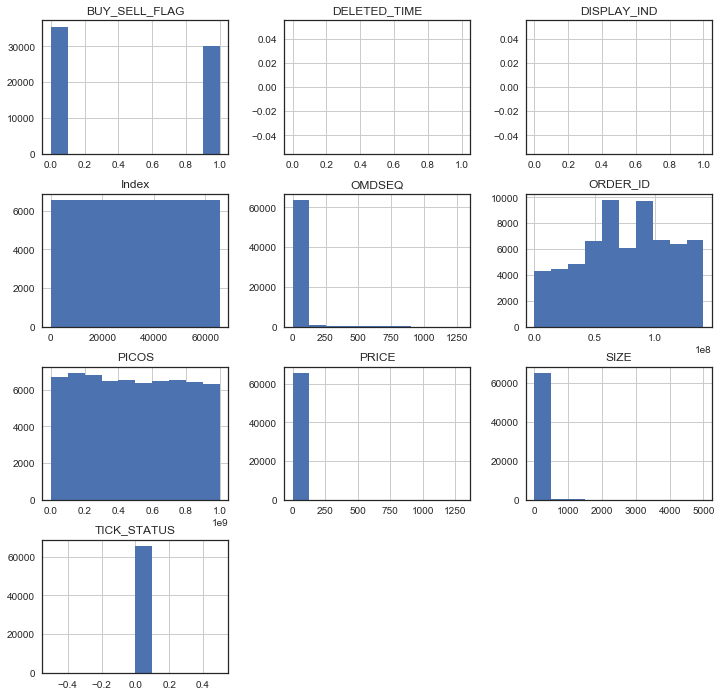

In [55]:
# plot distribution
df.hist(figsize=(12,12))
plt.show()

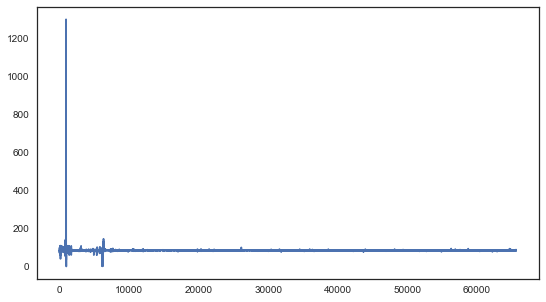

In [56]:
t = df['Index']
price = df['PRICE']
plt.plot(t,price)
plt.show()

In [57]:
df[df['PRICE']>=200]

,Index,Time,ORDER_ID,BUY_SELL_FLAG,RECORD_TYPE,MESSAGE_TYPE,DISPLAY_IND,MPID,DELETED_TIME,TICK_STATUS,PRICE,SIZE,PICOS,OMDSEQ,Hour,new_Hour
936,937,2013-10-23 09:30:19.757,2065825,1,R,F,NaN,UBSS,NaN,0,200.0,10,702348000,9,09:30:19.757000,09
938,939,2013-10-23 09:30:19.757,2065828,1,R,F,NaN,UBSS,NaN,0,1300.0,15,702348000,11,09:30:19.757000,09


# Doing Problem 4

In [58]:
# getting the real transcation price
df_EA = df[df['MESSAGE_TYPE']=='EA']
df_EA.head(3)

,Index,Time,ORDER_ID,BUY_SELL_FLAG,RECORD_TYPE,MESSAGE_TYPE,DISPLAY_IND,MPID,DELETED_TIME,TICK_STATUS,PRICE,SIZE,PICOS,OMDSEQ,Hour,new_Hour
3,4,2013-10-23 09:30:00.129,5333893,0,R,EA,NaN,NSDQ,NaN,0,84.49,38,770687000,335,09:30:00.129000,09
34,35,2013-10-23 09:30:00.335,2065600,0,R,EA,NaN,UBSS,NaN,0,84.76,1700,370159000,183,09:30:00.335000,09
36,37,2013-10-23 09:30:00.335,2065600,0,R,EA,NaN,UBSS,NaN,0,84.76,1630,563657000,323,09:30:00.335000,09


In [59]:
X = df_EA['Time']
Y = df_EA['PRICE']

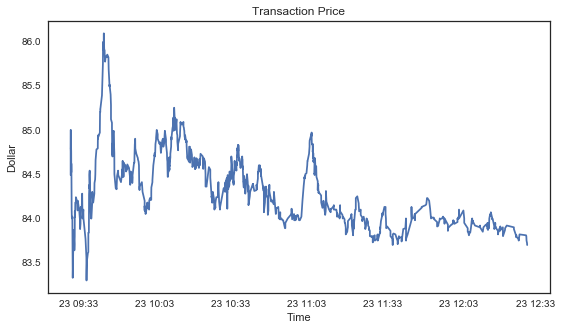

In [60]:
plt.plot(X,Y)
plt.title("Transaction Price")
plt.xlabel("Time")
plt.ylabel("Dollar")

### to calculate the microstructure noise

In [61]:
# getting the log of transaction price
import math
Y_all = Y.as_matrix()
Y_log = []
for y in Y_all:
    Y_log.append(math.log(y))

In [62]:
# get price difference
D_log = []
for i in range(len(Y_log)-1):
    D_log.append(Y_log[i+1]-Y_log[i])

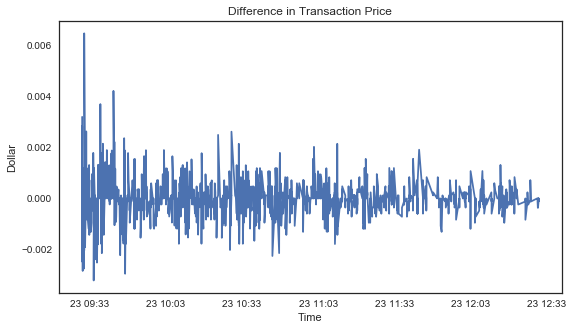

In [63]:
# visualize it
X_all = X.as_matrix()
X_new = X_all[:-1]
plt.plot(X_new,D_log)
plt.title("Difference in Transaction Price")
plt.xlabel("Time")
plt.ylabel("Dollar")

In [64]:
# This could potentially be helpful to count frequecy
import operator
def frequencyCnt(classList):
    '''retrieved from Intro to ML'''
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): 
            classCount[vote] = 0
        else:
            classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse=True)
    return sortedClassCount

In [65]:
frequencyCnt(D_log)[0]

(0.0, 1294)

In [66]:
print(len(D_log))

2632


In [67]:
print(len(set(D_log)))

915


### above is redundant... use equation (4.9) in the book; use Y_log 
#### Problem 4. (1)

In [68]:
# (datetime.datetime(X_all[0]) - datetime.datetime(2013,10,23)).total_seconds()
str(X_all[0])

'2013-10-23T09:30:00.129000000'

In [69]:
# create a new dictionary, key = time, value = log of transaction price
X_sec = []
for item in X_all:
    h  = str(item).split(":")[-3][-2:]
    m  = str(item).split(":")[-2]
    s1 = str(item).split(":")[-1].split(".")[0]    
    s2 = str(item).split(":")[-1].split(".")[1]
    newS = int(h) * 3600 + int(m) * 60 + float(s1) + float(s2)*pow(10,-len(s2))
    # print(h)
    # print(m)
    # print(s1)
    # print(s2)
    # print(newS)
    X_sec.append(newS)

Y_dict = dict(zip(X_sec,Y_log))

In [70]:
# len(Y_dict.keys())
len(list(Y_dict.keys()))

1631

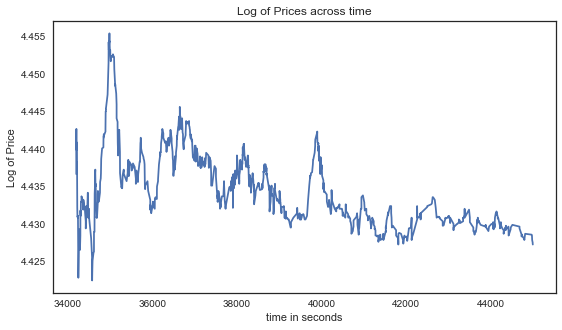

In [71]:
#### visualizing log of transaction price plotted against time
plt.plot(X_sec,Y_log)
plt.title("Log of Prices across time")
plt.xlabel("time in seconds")
plt.ylabel("Log of Price")

In [72]:
# function defintiion to execute subsampling
def getSample(Dict,dt):  # 
    L = list(Dict.keys())
    
    pos = int(L[0])
    sampled = {}
    sampled[L[0]] = Dict[L[0]]
    
    for l in L:
        if (int(l) > pos + dt -1):
            sampled[l] = Dict[l]
            pos = int(l)
    return sampled

In [73]:
X_sec

[34200.129,
 34200.335,
 34200.335,
 34200.34,
 34200.981,
 34200.981,
 34201.496,
 34201.496,
 34202.781,
 34202.781,
 34202.785,
 34203.796,
 34203.796,
 34204.888,
 34204.888,
 34204.888,
 34205.288,
 34206.186,
 34206.187,
 34206.286,
 34206.286,
 34208.384,
 34208.685,
 34208.685,
 34209.688,
 34209.688,
 34209.689,
 34211.395,
 34212.95,
 34212.95,
 34212.95,
 34212.95,
 34215.078,
 34215.078,
 34215.078,
 34215.829,
 34218.2,
 34218.2,
 34219.582,
 34219.583,
 34219.583,
 34219.583,
 34219.583,
 34219.583,
 34219.583,
 34219.583,
 34219.583,
 34219.583,
 34219.583,
 34219.583,
 34219.584,
 34219.595,
 34219.595,
 34219.595,
 34219.595,
 34219.783,
 34219.786,
 34220.677,
 34220.677,
 34221.115,
 34221.768,
 34221.769,
 34222.145,
 34222.86,
 34223.455,
 34223.455,
 34223.455,
 34223.526,
 34223.526,
 34223.526,
 34227.879,
 34234.481,
 34235.232,
 34235.232,
 34235.232,
 34235.232,
 34235.232,
 34235.232,
 34235.232,
 34235.232,
 34235.232,
 34239.554,
 34239.554,
 34239.554,
 3

In [74]:
# subsamples with intervals 1s, 10s, 30s
Y_1s = getSample(Y_dict,1)
Y_10s = getSample(Y_dict,10)
Y_30s = getSample(Y_dict,30)
Y_1s

{34200.129: 4.436633184164753,
 34201.496: 4.442651256490317,
 34202.781: 4.442651256490317,
 34203.796: 4.440059665924491,
 34204.888: 4.4405313640464446,
 34205.288: 4.4405313640464446,
 34206.186: 4.4405313640464446,
 34208.384: 4.4398237334000985,
 34209.688: 4.440767129696482,
 34211.395: 4.4398237334000985,
 34212.95: 4.4398237334000985,
 34215.078: 4.436988192747856,
 34218.2: 4.436869870556391,
 34219.582: 4.436869870556391,
 34220.677: 4.433788569232471,
 34221.115: 4.433907256550871,
 34222.145: 4.433788569232471,
 34223.455: 4.432125465974346,
 34227.879: 4.4309358393767555,
 34234.481: 4.431054865741236,
 34235.232: 4.430816798843313,
 34239.554: 4.430816798843313,
 34240.039: 4.431054865741236,
 34242.047: 4.429625613473161,
 34245.082: 4.426043520090656,
 34246.874: 4.426880490307507,
 34248.559: 4.426043520090656,
 34249.029: 4.422808628394115,
 34269.828: 4.42926798099632,
 34287.388: 4.427358444671965,
 34296.785: 4.428433007488037,
 34298.376: 4.431768726568696,
 3430

In [75]:
# Y_300s = getSample(Y_dict,300)
test = list(Y_1s.keys())
di = []
for i in range(len(test)-1):
    di.append(test[i+1]-test[i])
print(sum(di)/len(di))

13.537002509410291


In [76]:
# function definition to take out every k samples
def sampleWithK(Dict,k):
    L = list(Dict.keys())
    keys = L[0::k]
    
    newD = {}
    for i in keys:
        newD[i] = Dict[i]
    return newD

In [77]:
def computeYt(Dict):
    keys = list(Dict.keys())
    l = [Dict[a] for a in keys]  # new dictionary with values from selected keys from the bigger dictionary
    list1 = l[1:]
    list2 = l[:-1]
    r = [(a-b)**2 for a, b in zip(list1,list2)]
    Y = sum(r)
    return Y

In [78]:
# with 1 sec interval
Y_1s_1 = sampleWithK(Y_1s,k=1)
Y_1s_5 = sampleWithK(Y_1s,k=5)
Y_1s_10 = sampleWithK(Y_1s,k=10)

In [79]:
# compute Ytk
Yt_1_1 = computeYt(Y_1s_1)
Yt_1_5 = computeYt(Y_1s_5)
Yt_1_10 = computeYt(Y_1s_10)
print("Yt_1_1, Yt_1_5, Yt_1_10 are %s, %s, %s" % (Yt_1_1, Yt_1_5, Yt_1_10))

Yt_1_1, Yt_1_5, Yt_1_10 are 0.0007411832092014584, 0.0009145589803465179, 0.0007842300899377884


In [80]:
# with 10 secs interval
Y_10s_1 = sampleWithK(Y_10s,k=1)
Y_10s_5 = sampleWithK(Y_10s,k=5)
Y_10s_10 = sampleWithK(Y_10s,k=10)

In [81]:
# compute Ytk
Yt_10_1 = computeYt(Y_10s_1)
Yt_10_5 = computeYt(Y_10s_5)
Yt_10_10 = computeYt(Y_10s_10)
print("Yt_10_1, Yt_10_5, Yt_10_10 are %s, %s, %s" % (Yt_10_1, Yt_10_5, Yt_10_10))

Yt_10_1, Yt_10_5, Yt_10_10 are 0.000738425300268038, 0.0008494346932890142, 0.0010157552417323099


In [82]:
# with 10 secs interval
Y_30s_1 = sampleWithK(Y_30s,k=1)
Y_30s_5 = sampleWithK(Y_30s,k=5)
Y_30s_10 = sampleWithK(Y_30s,k=10)

In [83]:
# compute Ytk
Yt_30_1 = computeYt(Y_30s_1)
Yt_30_5 = computeYt(Y_30s_5)
Yt_30_10 = computeYt(Y_30s_10)
print("Yt_30_1, Yt_30_5, Yt_30_10 are %s, %s, %s" % (Yt_30_1, Yt_30_5, Yt_30_10))

Yt_30_1, Yt_30_5, Yt_30_10 are 0.0007499917041055538, 0.0011803982465517233, 0.0016360053026147278


#### 4. (2)

In [84]:
# for sampling with 1 sec 


346.0